# Exploring Adult Income Dataset

## Question 1

Why did I choose this dataset? I thought seeing and working with an adult income dataset would be particularly interesting. Seeing the distribution of income and how certain factors influence income distribution can be rendered an interesting story. 

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Checking and changing working directory
os.getcwd()
os.chdir('C:\\Users\\16466\\adult_incomecsv')

In [3]:
# Load dataset
df = pd.read_csv('adult.csv')
# Printout dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Question 2

This answers the first of my questions --namely, how clean is the dataset? It is preferable that the dataset is mostly clean. In this case, this dataset seems mostly clean, without any null values. 

In [4]:
# Checking how clean (or unclean) the dataset is
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
print(df.duplicated().sum()) # Checking duplicated rows

df = df.drop_duplicates() # Subsetting dataset

print(df.duplicated().sum()) # Verifying

52
0


## Question 3

What is the race distribution of the dataset? The dataset consists primarily of white individuals. This is an important point to note. The overwhelming majority of people accounted for in the dataset are not minorities.

In [6]:
df.race.value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

## Question 4

Are the incomes gathered primarily of a particular country? Ye. Although the majority of incomes recorded are from the United States, many other countries are accounted for. One prediction that I have is that the income distribution will vary considerably. 

In [7]:
df['native-country'].value_counts()

United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

## Question 5

How spread out is the income? The income is fairly imbalanced, with the majority making less than 50k a year.

In [8]:
df.income.value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

In [9]:
# Getting an overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [10]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Question 6

Another question I had was whether the dataset had mostly one type of variable (i.e., categorical or continuous). As can be seen above, the dataset seems largely mixed.

## EDA

## Question 7 

What is the age distribution? The majority of people are under 50 years old.

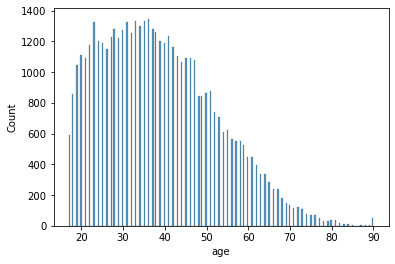

In [11]:
sns.histplot(x='age', bins=212, data=df);

## Question 8

What is the distribution of income given educational attainment? It seems clear that the higher the educational attainment, the greater the income.

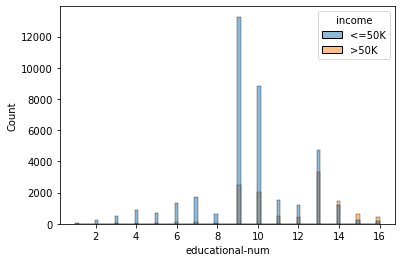

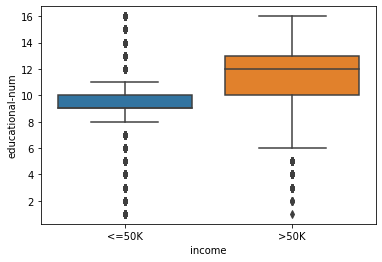

In [12]:
sns.histplot(x='educational-num', hue='income', data=df )
plt.show();

sns.boxplot(x='income', y='educational-num', data=df)
plt.show()

## Question 9

How many people have a higher-education? 

In [13]:
education_level = df.education

df.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [14]:
education_level.value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

In [15]:
tot = ((8025 + 2657 + 2061 + 1601 + 834 + 594) / 48842)
print('The percentage of people with a higher-education in the dataset is about {:0.2f}%.'.format(tot))

The percentage of people with a higher-education in the dataset is about 0.32%.


## Question 10

What is the income distribution given race? This question remains unanswered. However, I will attempt to answer it later on since it is an important question in my analysis.

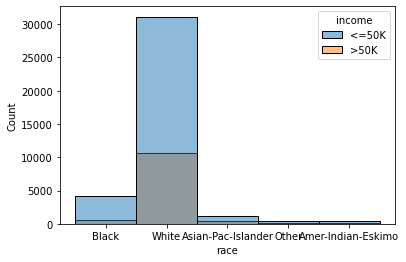

In [16]:
sns.histplot(x='race', hue='income', data=df )
plt.show();

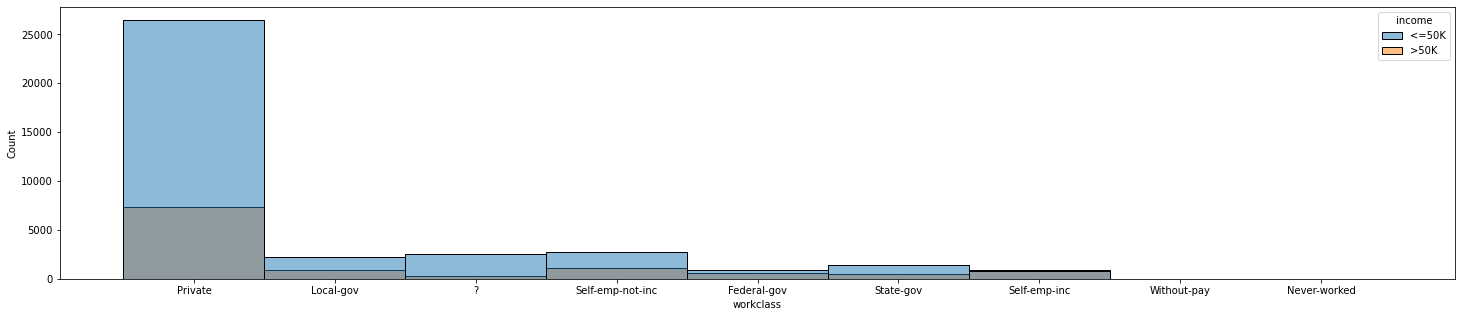

In [17]:
plt.figure(figsize=(25, 5))
sns.histplot(x='workclass', hue='income', data=df )
plt.show();

In [18]:
# Binarizing the income column
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1}) # incomes >50k are denoted as 1; incomes <=50k are denoted as 0.
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


## Question 9 & 10

What is the income distribution given workclass? In answering this question, I came about answering another question: What is the distribution of the workclasses? The private workclass is the workclass most represented in the data. As to the former, original question: it appears that the self-employed class (entrepreneural class?) is making the most money, not accounting for neither experience nor hours worked per week.

What is the difference in median age of the workclasses? It appears that the difference isn't too significant. However, those noted as "never-worked" have a much smaller median than the other working classes. This can be explained away by their not being documented due to not working.

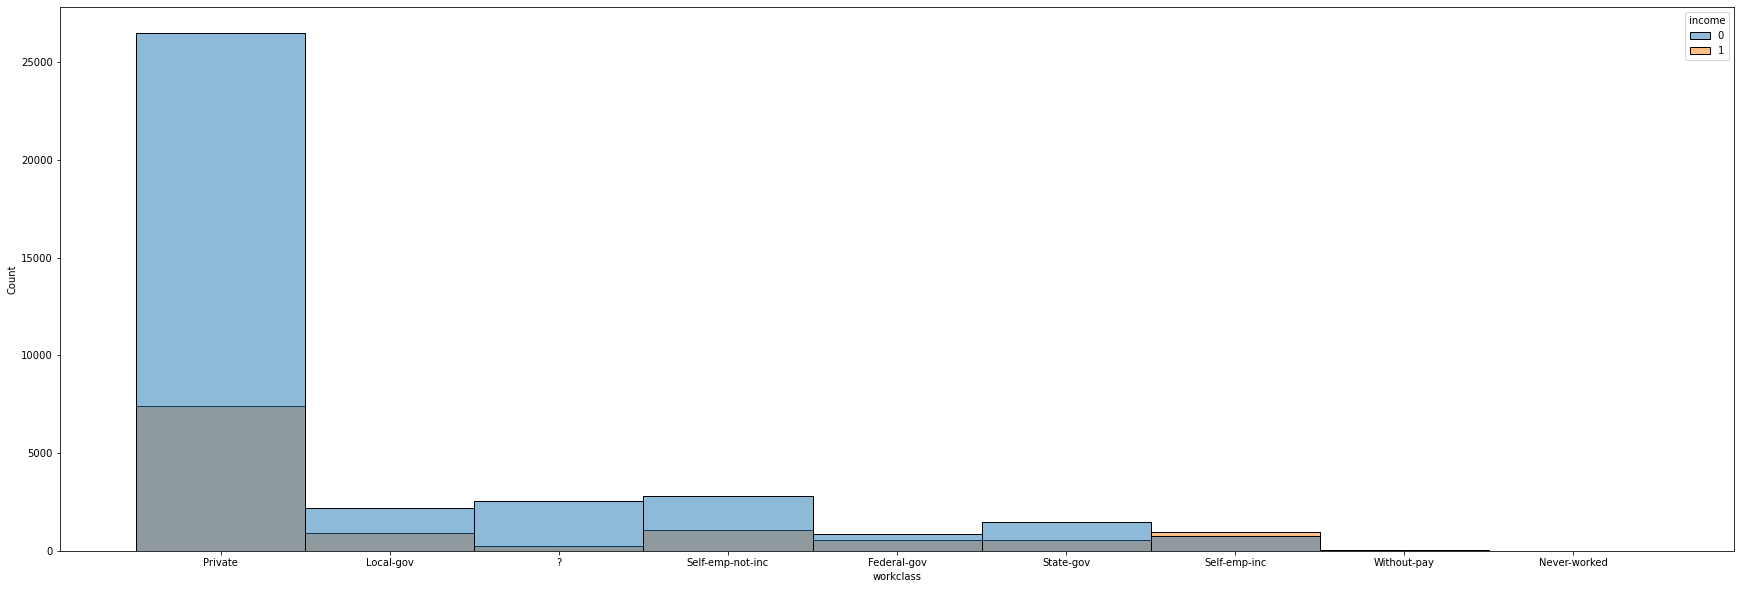

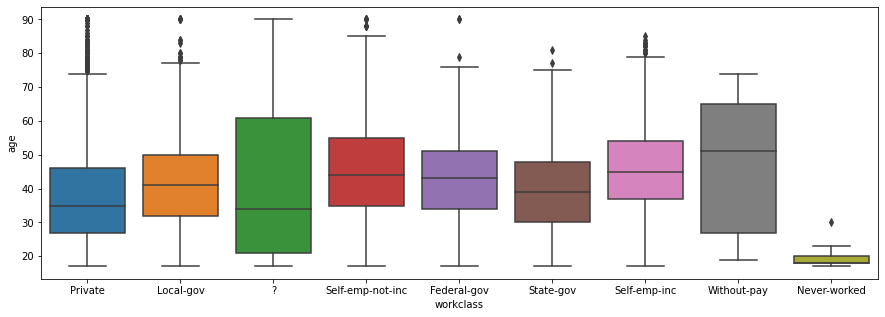

In [19]:
plt.figure(figsize=(30,10))
sns.histplot(x='workclass', hue='income', data=df )
plt.show();

plt.figure(figsize=(15,5))
sns.boxplot(x='workclass', y='age', data=df)
plt.show()

## Question 11

Does age influence income level? It seems that the median of those making more than 50k a year is higher than that of those making less than 50k. It is reasonable to assume that age is connected with experience, which, in turn, is connected to income. Income is usually commensurate with experience.

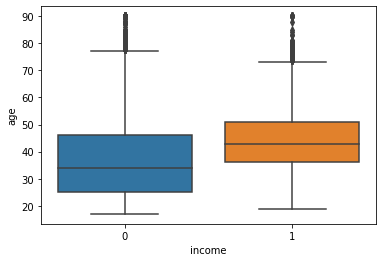

In [20]:
sns.boxplot(x='income', y='age', data=df)
plt.show()

## Question 12

Are those that are working more hours making more money? It seems so. I suspect that the many outliers are in part due to the dataset's incorporating many diverse countries and these countries' respective GDPs. But, by and large, those that worked more hours were paid more. 

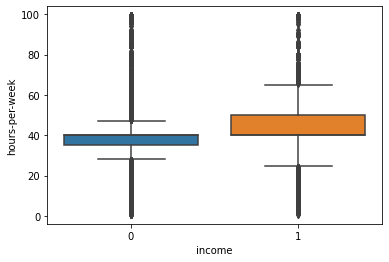

In [21]:
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.show()

## Question 13

To follow on question 9, which workclass is getting the highest salary? It seems that my answer from earlier was correct. However, by grouping by income, we get a much richer picture. Federal workers are the second highest paid, followed by state workers. 

In [22]:
df.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.553719
Federal-gov         0.391760
Local-gov           0.295599
Self-emp-not-inc    0.278943
State-gov           0.267542
Private             0.217986
Without-pay         0.095238
?                   0.094812
Never-worked        0.000000
Name: income, dtype: float64

## Question 14 

Which gender gets paid higher (usually)? Males make a higher mean income than females.

In [23]:
df.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.303919
Female    0.109360
Name: income, dtype: float64

## Question 15

Returning to the question of race (question 10), do certain races make more money? It seems clear that whites and asians make the higher incomes. However, it isn't too clear as to how a country's economic status influence said incomes.

In [24]:
df.groupby('race')['income'].mean().sort_values(ascending=False)

race
Asian-Pac-Islander    0.269611
White                 0.254135
Other                 0.123153
Black                 0.120863
Amer-Indian-Eskimo    0.117021
Name: income, dtype: float64

# Summary

A story arises from the data and the questions asked and answered. It is one where workers' income is largely influenced by experience, education, race, and gender. Workers with greater experience or education make more income. There is a gender income disparity, with males making more than females. There is also an income disparity among races, with whites making the most. The top earners of society are the self-employed, which can be interpreted as those who own companies --that is, entrepreneurs. Given that most of the data is on incomes from the United States, the story becomes trite, since it is known all too well. The story is that of the United States. The issues raised here aren't new; in fact, many of them have been spoken about, in a rather superficial and stifled way, for decades in the media. 